## Observations and Insights 

After creating a clean data frame, I noticed that the treatment was carried on 248 mice; 51% male and 49% female; a difference of 2%, as seen in the pie chart plotting. 

Mice with SCC tumors received treatment with a range of different drug regimens. The performance of Pymaceuticals’ drug of interest, Capomulin, was compared against the other treatment regimens. There were 10 treatment regimens, as seen in the bar chart. As stated above, there was more focus on the Capomulin, followed by Ramicane and least focus on the Propriva. 

According to the boxplot, the final tumor volume treated by Capomulin and Ramicane is smaller than the others. Although Ramicane seems to have a smaller final tumor volume, the number of mice treated by Ramicane is slightly less than Capomulin, only by a few. However, the median for both final tumor volume is very close; Capomulin has a median of 41.6 in comparison to the median of Ramicane which is 40.7.  Plus, the mean is also very similar for the final tumor volume, when treated by Capomulin and Remicane (see summary DataFrame of mean, median etc). In order to have a more accurate conclusion, the treatment of both regimens needs to be continued with the same number of mice, over the same time period. Only then can this be a fair test. 

Mouse ID l509 was treated by Capomulin. The tumor volume seems to decrease after around day 19. However, according the line graph, the tumor volume begins to increase again, after a few days of decreasing, especially at around day 35. The question here is – is the treatment effective enough? It would be interesting to compare this data with a mouse who was treated using Ramicane, to see on which day the tumor volume begins to decrease and if it does increase after a certain period of time. In order to see if this is the case, I decided to choose a mouse that had been treated with Remicane, who was also a male of a similar age and weight as mouse ID l509. I chose mouse ID y449 and mouse ID u196.  See results in comparison to mouse ID l509. Although the tumor volume for mouse ID u196 increased after 20 days, both mice treated with Remicane, show a consistent decrease in tumor volume. 

There is a positive correlation between the average weight and final tumor volume which is 0.84, this shows there is a relation between the two variables. In addition, the r-squared which is 0.71 and shows that the final tumor volume could be predicted when looking at the average weight of the mouse.

In [8]:
# Dependencies and Setup
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data=pd.merge(mouse_metadata,study_results,on="Mouse ID", how ='outer')

# Display the data table for preview


In [9]:
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
#sort data to help with median later
merged_tumor=merged_data.sort_values(["Tumor Volume (mm3)"], ascending=True)
merged_tumor.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


In [11]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [12]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [13]:
# Checking the number of mice.
#count number of mice
#no_mice={"Tumor Volume (mm3)"}
#mice_summed=merged_data.groupby(["Tumor Volume (mm3)"])
#mice_summed
mice_altogether = len(merged_data["Mouse ID"].unique())
mice_altogether

249

In [14]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice


array(['g989'], dtype=object)

In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
which_duplicate_mice=merged_data.loc[merged_data["Mouse ID"]==duplicate_mice[0]]
which_duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=merged_data.loc[merged_data["Mouse ID"]!="g989"]
#clean_data = merged_data.drop(908)
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Checking the number of mice in the clean DataFrame.
clean_data_check=len(clean_data["Mouse ID"].unique())

clean_data_check

248

## Summary Statistics

In [18]:
#Method 1

#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_reg=clean_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

median_reg=clean_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

variance_reg=clean_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

standard_reg=clean_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

sem_reg=clean_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.

method_one_df=pd.DataFrame({
    "Mean Tumor Volume":mean_reg,
    "Median Tumor Volume":median_reg,
    "Tumor Volume Variance":variance_reg,
    "Tumor Volume Std. Dev.":standard_reg,
    "Tumor Volume Std. Err.":sem_reg})

method_one_df




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Group the DataFrame by drug regimen
grouped_by_drug = clean_data.groupby('Drug Regimen')

# Using the aggregation method, produce the same summary statistics in a single line

clean_data_agg = grouped_by_drug["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std','sem'])
clean_data_agg

styles = [dict(selector="caption",
            props=[("text-align", "right"),
                   ("font-size", "100%"),
                   ("color", 'black'),
                  ("font-weight", "bold")])]

clean_data_agg.style.set_caption("Tumor Volume (mm3)").set_table_styles(styles)
#clean_data_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_per_reg = clean_data.groupby(["Drug Regimen"]).count()["Mouse ID"].sort_values(ascending=False)
mice_per_reg


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

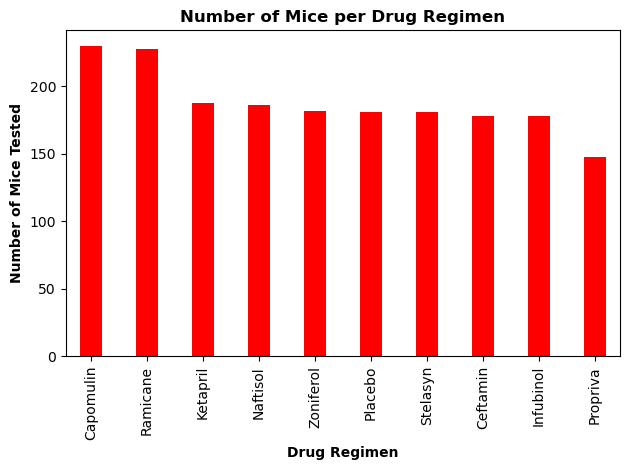

In [29]:
# Generate a bar plot showing the total number of mice for each treatment 
pandas_bar = mice_per_reg.plot(kind='bar', width=0.4, color='r')

# Set x/y label, title
pandas_bar.set_title(label='Number of Mice per Drug Regimen', fontweight = 'bold')
pandas_bar.set_xlabel('Drug Regimen', fontweight = 'bold')
pandas_bar.set_ylabel('Number of Mice Tested', fontweight = 'bold')

# Save bar graph to Images folder
plt.tight_layout()
pandas_bar.figure.savefig('Images/pandas_bar_drug_regimen.png')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()

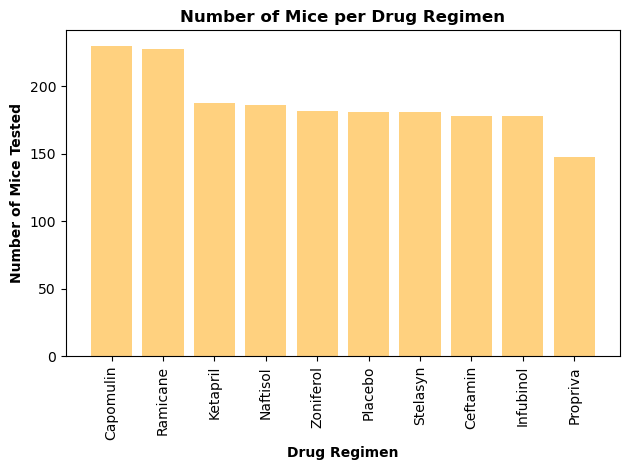

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set x axis
x_axis_reg = np.arange(len(mice_per_reg))
regimen_name = list(mice_per_reg.index.values)
 
# Create bar chart
pyplot_bar = plt.bar(x_axis_reg, mice_per_reg, color='orange', alpha=0.5, width=0.8)

# name the x/y axis, title
plt.xticks(x_axis_reg, regimen_name, rotation='vertical')
plt.title('Number of Mice per Drug Regimen', fontweight = 'bold')
plt.xlabel('Drug Regimen', fontweight = 'bold')
plt.ylabel('Number of Mice Tested', fontweight = 'bold')

# Save bar graph to Images folder
plt.tight_layout()
plt.savefig('Images/pyplot_bar_drug_regimen.png')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()

In [22]:
#Find out how many male and female mice in total

group_gender = clean_data.groupby("Sex")["Sex"].count()
group_gender





Sex
Female    922
Male      958
Name: Sex, dtype: int64

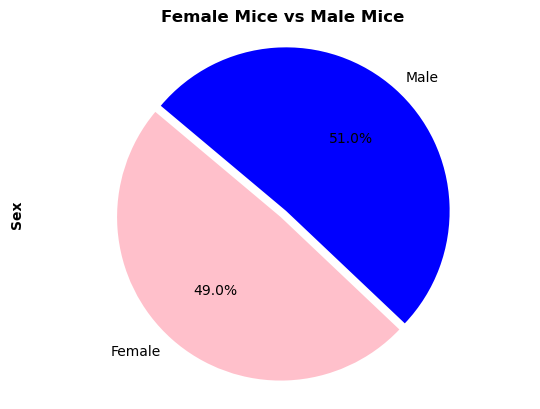

In [23]:
# Generate a pie chart
colors = ['pink', 'blue']
explode=(0.05, 0)

pyplot_pie_chart = group_gender.plot(y='Total Count', kind='pie', colors=colors, explode = explode, autopct='%1.1f%%', startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Set x/y label, title
pyplot_pie_chart.set_title(label='Female Mice vs Male Mice', fontweight = 'bold')
pyplot_pie_chart.set_ylabel('Sex', fontweight = 'bold')


# Save bar graph to Images folder
pyplot_pie_chart.figure.savefig('Images/gender_of_mice_pie_pandas.png')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()

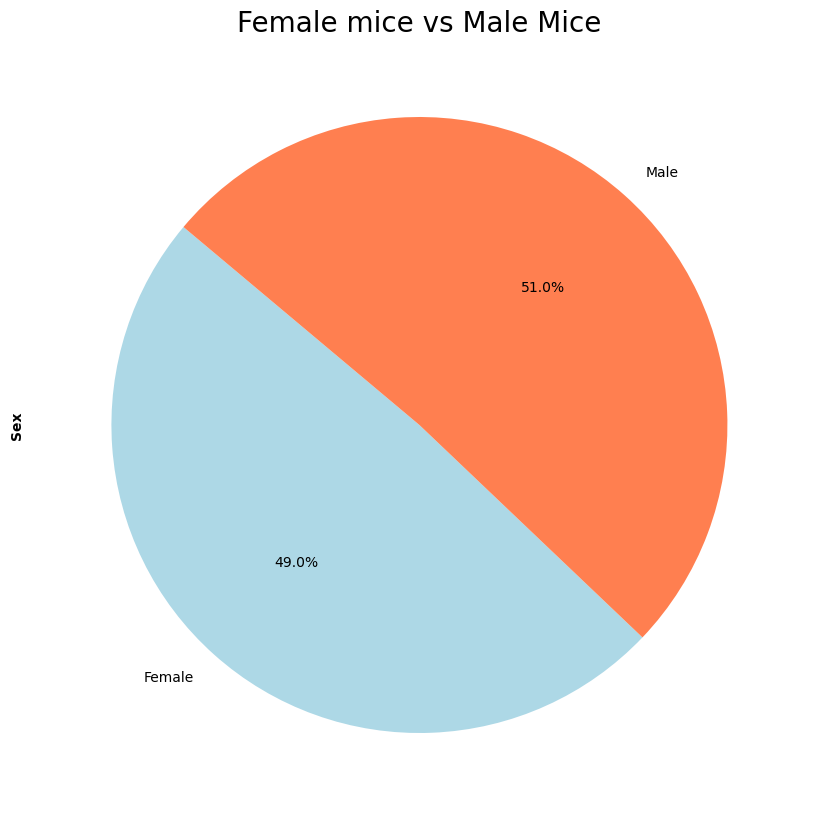

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.0,51.0]

#Set colors for each section of the pie
colors = ['lightblue', 'coral']


#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes,labels=labels, colors=colors, autopct="%1.1f%%", startangle=140,)
plt.title('Female mice vs Male Mice',fontsize = 20)
plt.ylabel('Sex',fontweight = 'bold')


plt.savefig('Images/py_plot_gender_of_mice.png', bbox_inches = "tight")
plt.show()



## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_size = clean_data.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
tumor_size_df = tumor_size.reset_index()

In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
treatments_list =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_size = tumor_size_df.loc[tumor_size_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    treatments_list.append(tumor_size)
    
    # Calculate the IQR different quartiles
    quartiles = tumor_size.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = tumor_size.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_size.loc[(tumor_size < lower_bound) 
                  | (tumor_size > upper_bound)]
    
    

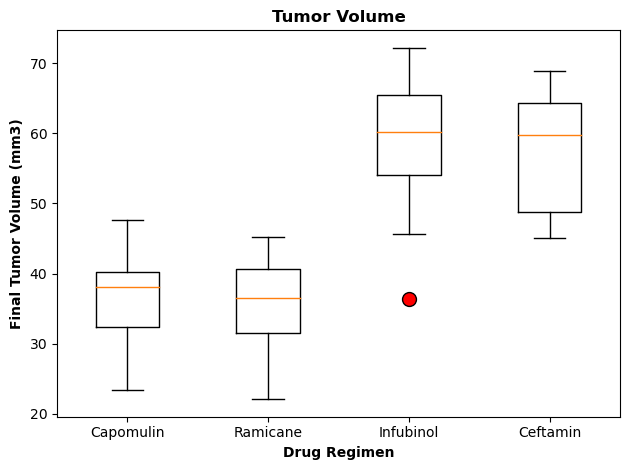

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, tumor_size_plot = plt.subplots()
tumor_size_plot.boxplot(treatments_list, labels=treatments, flierprops={'markerfacecolor':'r','markersize': 10})

#set title and labels
tumor_size_plot.set_title('Tumor Volume', fontweight='bold')
tumor_size_plot.set_xlabel('Drug Regimen', fontweight='bold')
tumor_size_plot.set_ylabel('Final Tumor Volume (mm3)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
tumor_size_plot.figure.savefig('Images/tumor_size_boxplot.png')


## Line and Scatter Plots

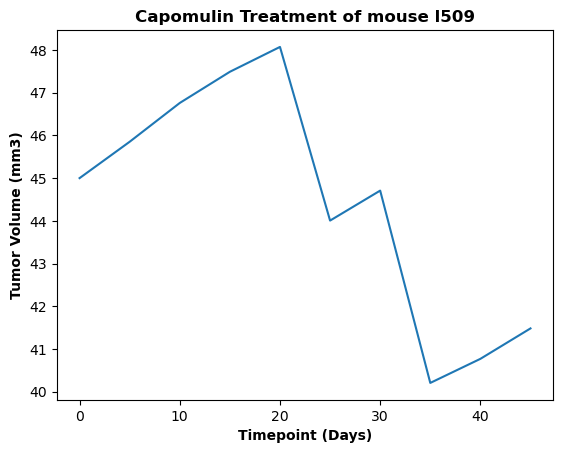

In [70]:
# Generate a line plot of tumor volume vs. time point for the mouse treated Capomulin
Capo_treatment = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

# choose a mouse to study and gather data for that mouse
chosen_mouse_id = 'l509'
chosen_mouse_df = Capo_treatment.loc[Capo_treatment['Mouse ID'] == chosen_mouse_id]

# plot a line graph
timepoint = plt.plot(chosen_mouse_df['Timepoint'], chosen_mouse_df['Tumor Volume (mm3)'])

# Set the title and axises
plt.title(f"Capomulin Treatment of mouse {chosen_mouse_id}", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')

#save image
plt.savefig('Images/capomulin_treatment_mouse_id_l509.png')

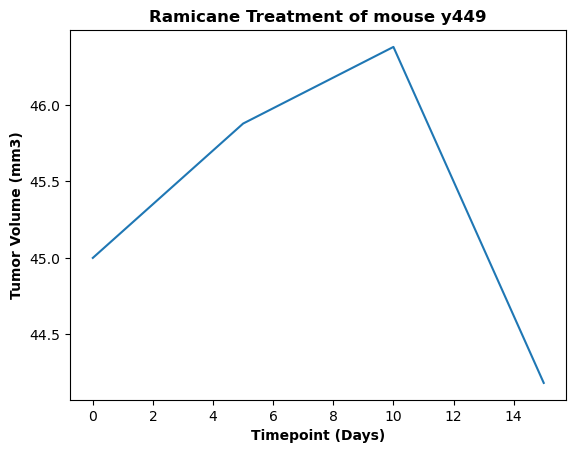

In [30]:
# Generate a line plot of tumor volume vs. time point for the mouse treated Capomulin
Rami_treatment = clean_data.loc[clean_data['Drug Regimen'] == 'Ramicane']

# choose a mouse to study and gather data for that mouse
chosen_mouse_id_rami = 'y449'
chosen_mouse_df_rami = Rami_treatment.loc[Rami_treatment['Mouse ID'] == chosen_mouse_id_rami]

# plot a line graph
timepoint = plt.plot(chosen_mouse_df_rami['Timepoint'], chosen_mouse_df_rami['Tumor Volume (mm3)'])

# Set the title and axises
plt.title(f"Ramicane Treatment of mouse {chosen_mouse_id_rami}", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')

#save image
plt.savefig('Images/ramicane_treatment_mouse_id_y449.png')

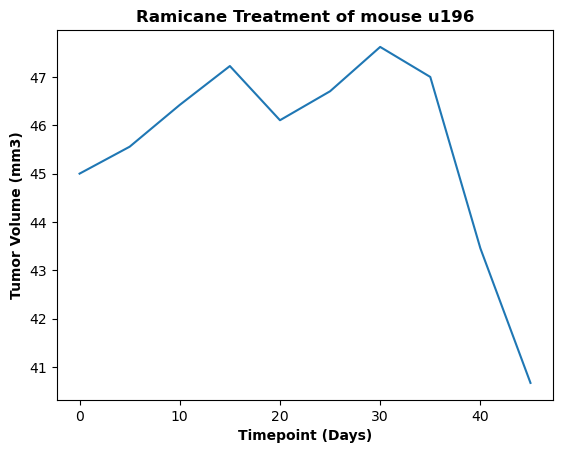

In [32]:
# Generate a line plot of tumor volume vs. time point for the mouse treated Capomulin
Rami_treatment_two = clean_data.loc[clean_data['Drug Regimen'] == 'Ramicane']

# choose a mouse to study and gather data for that mouse
chosen_mouse_id_rami_two = 'u196'
chosen_mouse_df_rami_two = Rami_treatment_two.loc[Rami_treatment_two['Mouse ID'] == chosen_mouse_id_rami_two]

# plot a line graph
timepoint = plt.plot(chosen_mouse_df_rami_two['Timepoint'], chosen_mouse_df_rami_two['Tumor Volume (mm3)'])

# Set the title and axises
plt.title(f"Ramicane Treatment of mouse {chosen_mouse_id_rami_two}", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')

#save image
plt.savefig('Images/ramicane_treatment_mouse_id_u196.png')

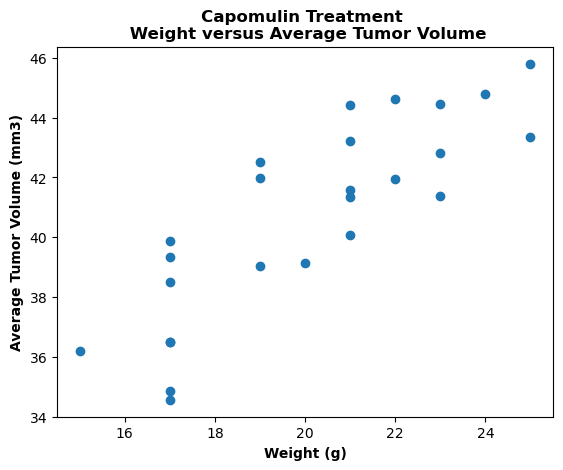

In [84]:
# Calculate the mean of the Weight (g) and the Tumor Volume (mm3)
Capo_gp = Capo_treatment.groupby('Mouse ID').mean()
average_mouse_weight = Capo_gp['Weight (g)']
average_mouse_tumor = Capo_gp['Tumor Volume (mm3)']

# Generate a scatter plot
plt.scatter(average_mouse_weight, average_mouse_tumor)

# Set x/y label, title
plt.title('Capomulin Treatment \n Weight versus Average Tumor Volume', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

# Save box plot graph to Images folder
plt.savefig('Images/scatter_weight_tumor.png')




## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.71


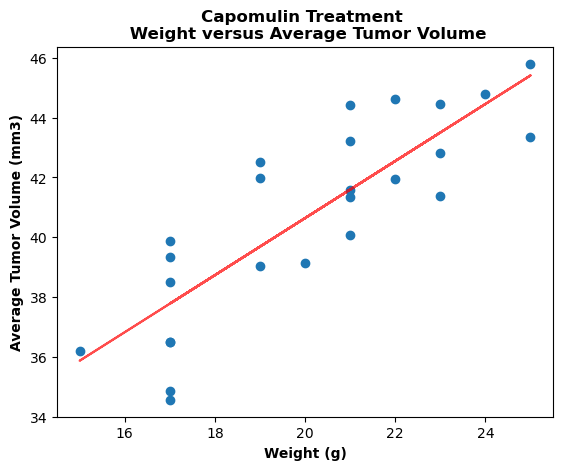

In [85]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

 #Define x,y values
x_values = average_mouse_weight
y_values = average_mouse_tumor

# Calculate the correlation
correlation_point = round(st.pearsonr(x_values, y_values)[0],2)

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared
r_square = round(rvalue**2,2)


# y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot the scatter graph with liner regression line, equation of line, r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)


# Define title and axises - labels
plt.title('Capomulin Treatment \n Weight versus Average Tumor Volume', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')
print(f"The correlation between mouse weight and the average tumor volume is {correlation_point}")
print(f"The r-squared is: {r_square}")


# Save correlation line scatter graph into Images folder
plt.savefig('Images/scatter_with_weight_plus_tumor_corre.png')

